In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Which Factors Influence the Price of Health Insurance?
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [15]:
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])

# EDA and Visualizations

<Axes: >

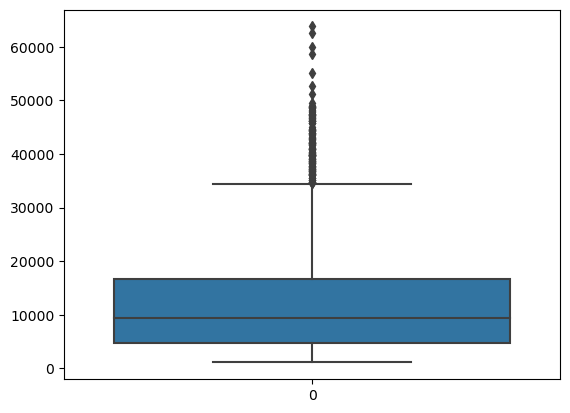

In [16]:
sns.boxplot(df['charges'])

C:\Users\ibkc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

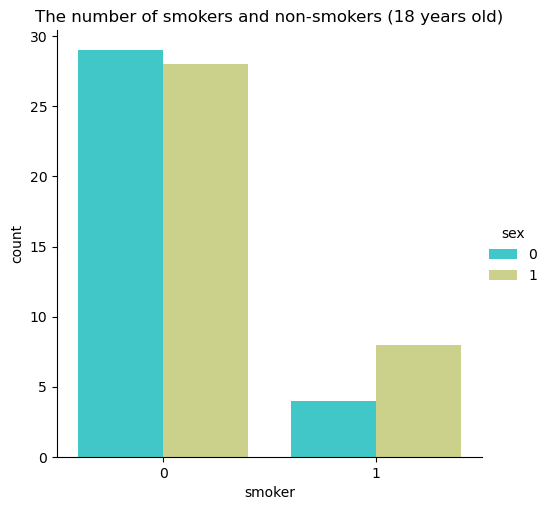

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

### Oh. I was hoping the result would be different. 18 years old - a very young age. Does smoking affect the cost of treatment at this age?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

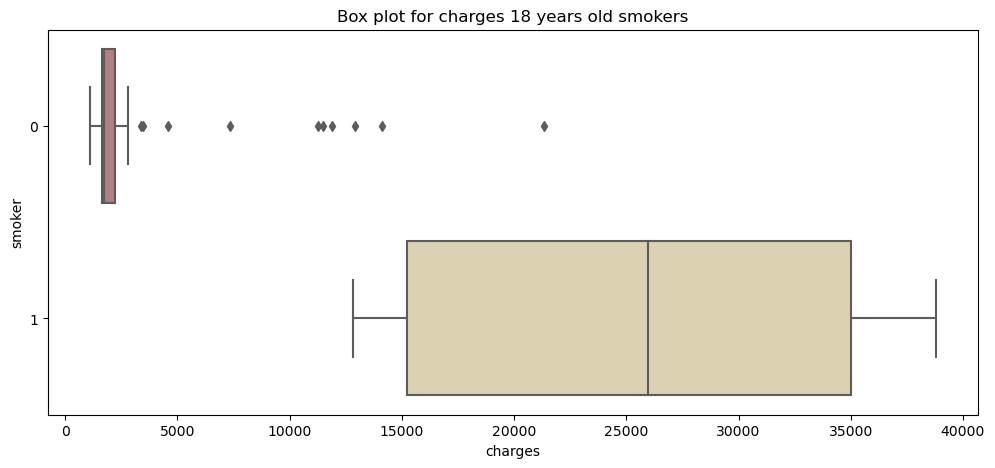

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

### Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

C:\Users\ibkc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


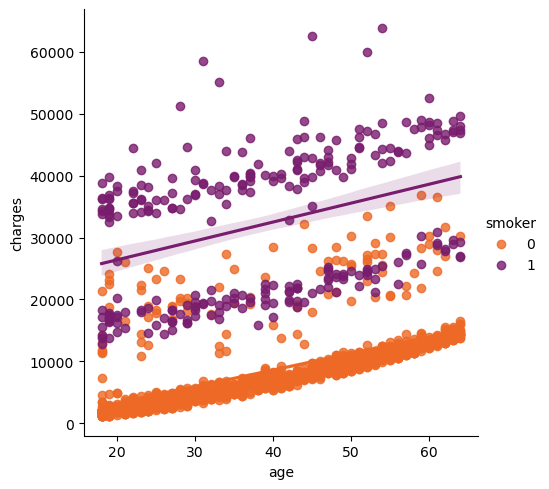

In [19]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')

### In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?

<Axes: xlabel='charges', ylabel='Count'>

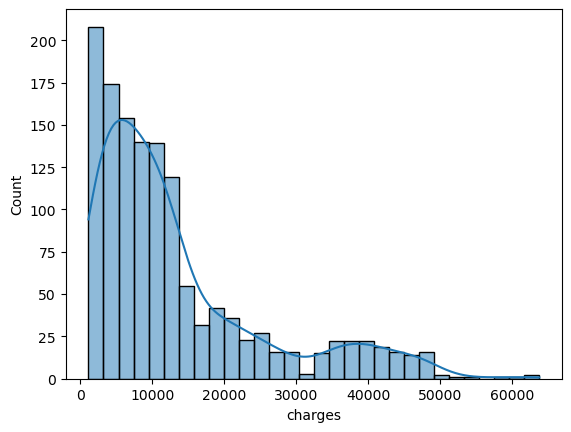

In [20]:
sns.histplot(data=df,x='charges',kde=True)

C:\Users\ibkc\AppData\Local\Temp\ipykernel_21972\3697456241.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

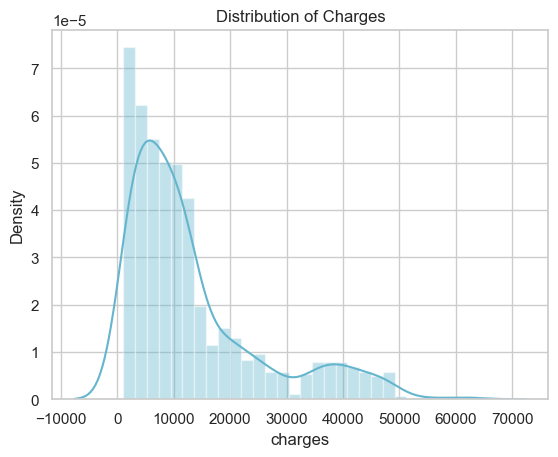

In [22]:
sns.set(style='whitegrid')
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

##### This distribution is right-skewed. To make it closer to normal we can apply natural log


C:\Users\ibkc\AppData\Local\Temp\ipykernel_21972\782112099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


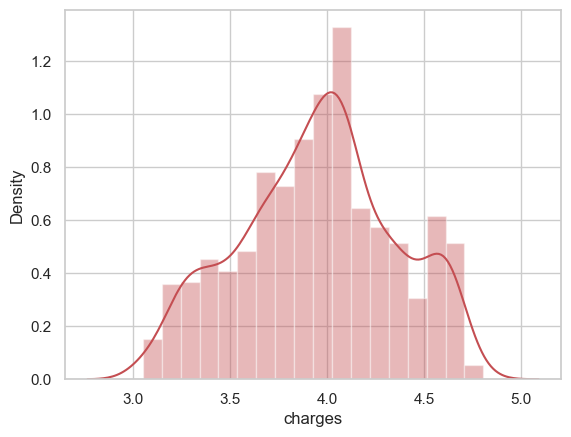

In [23]:
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

##### Now let's look at the charges by region


In [24]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges = charges.head()

<Axes: xlabel='region', ylabel='charges'>

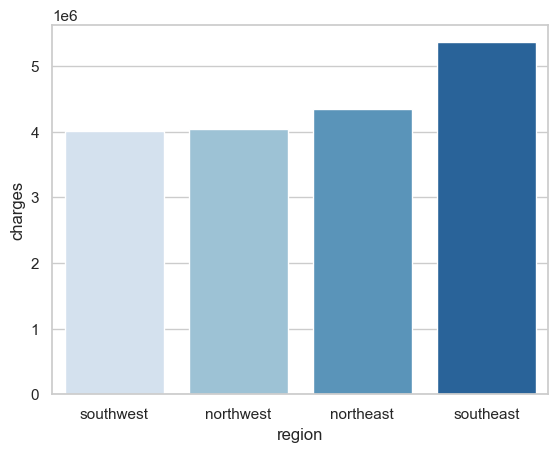

In [25]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

##### So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region


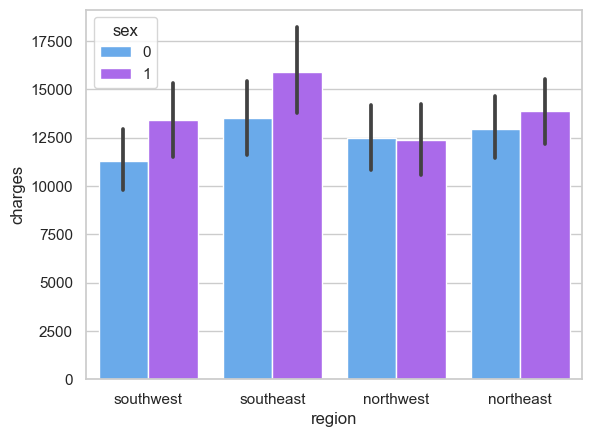

In [27]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

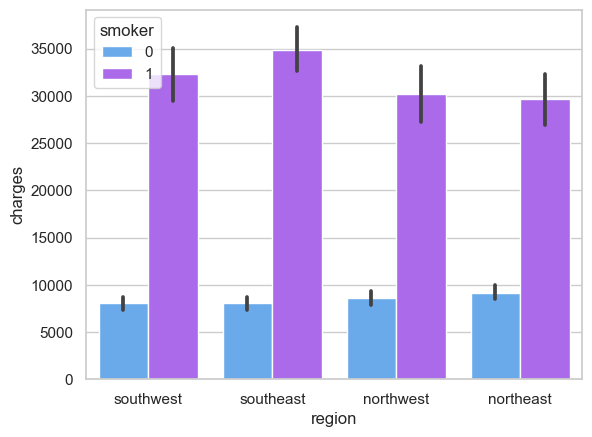

In [30]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

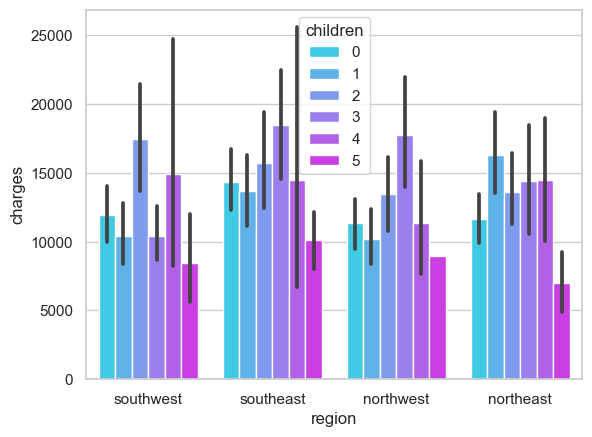

In [31]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='cool')


In [32]:
df['region']= label_encoder.fit_transform(df['region'])

In [33]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

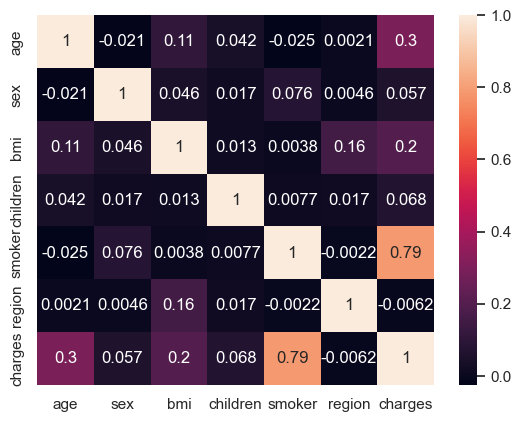

In [34]:
sns.heatmap(df.corr(),annot=True)

C:\Users\ibkc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


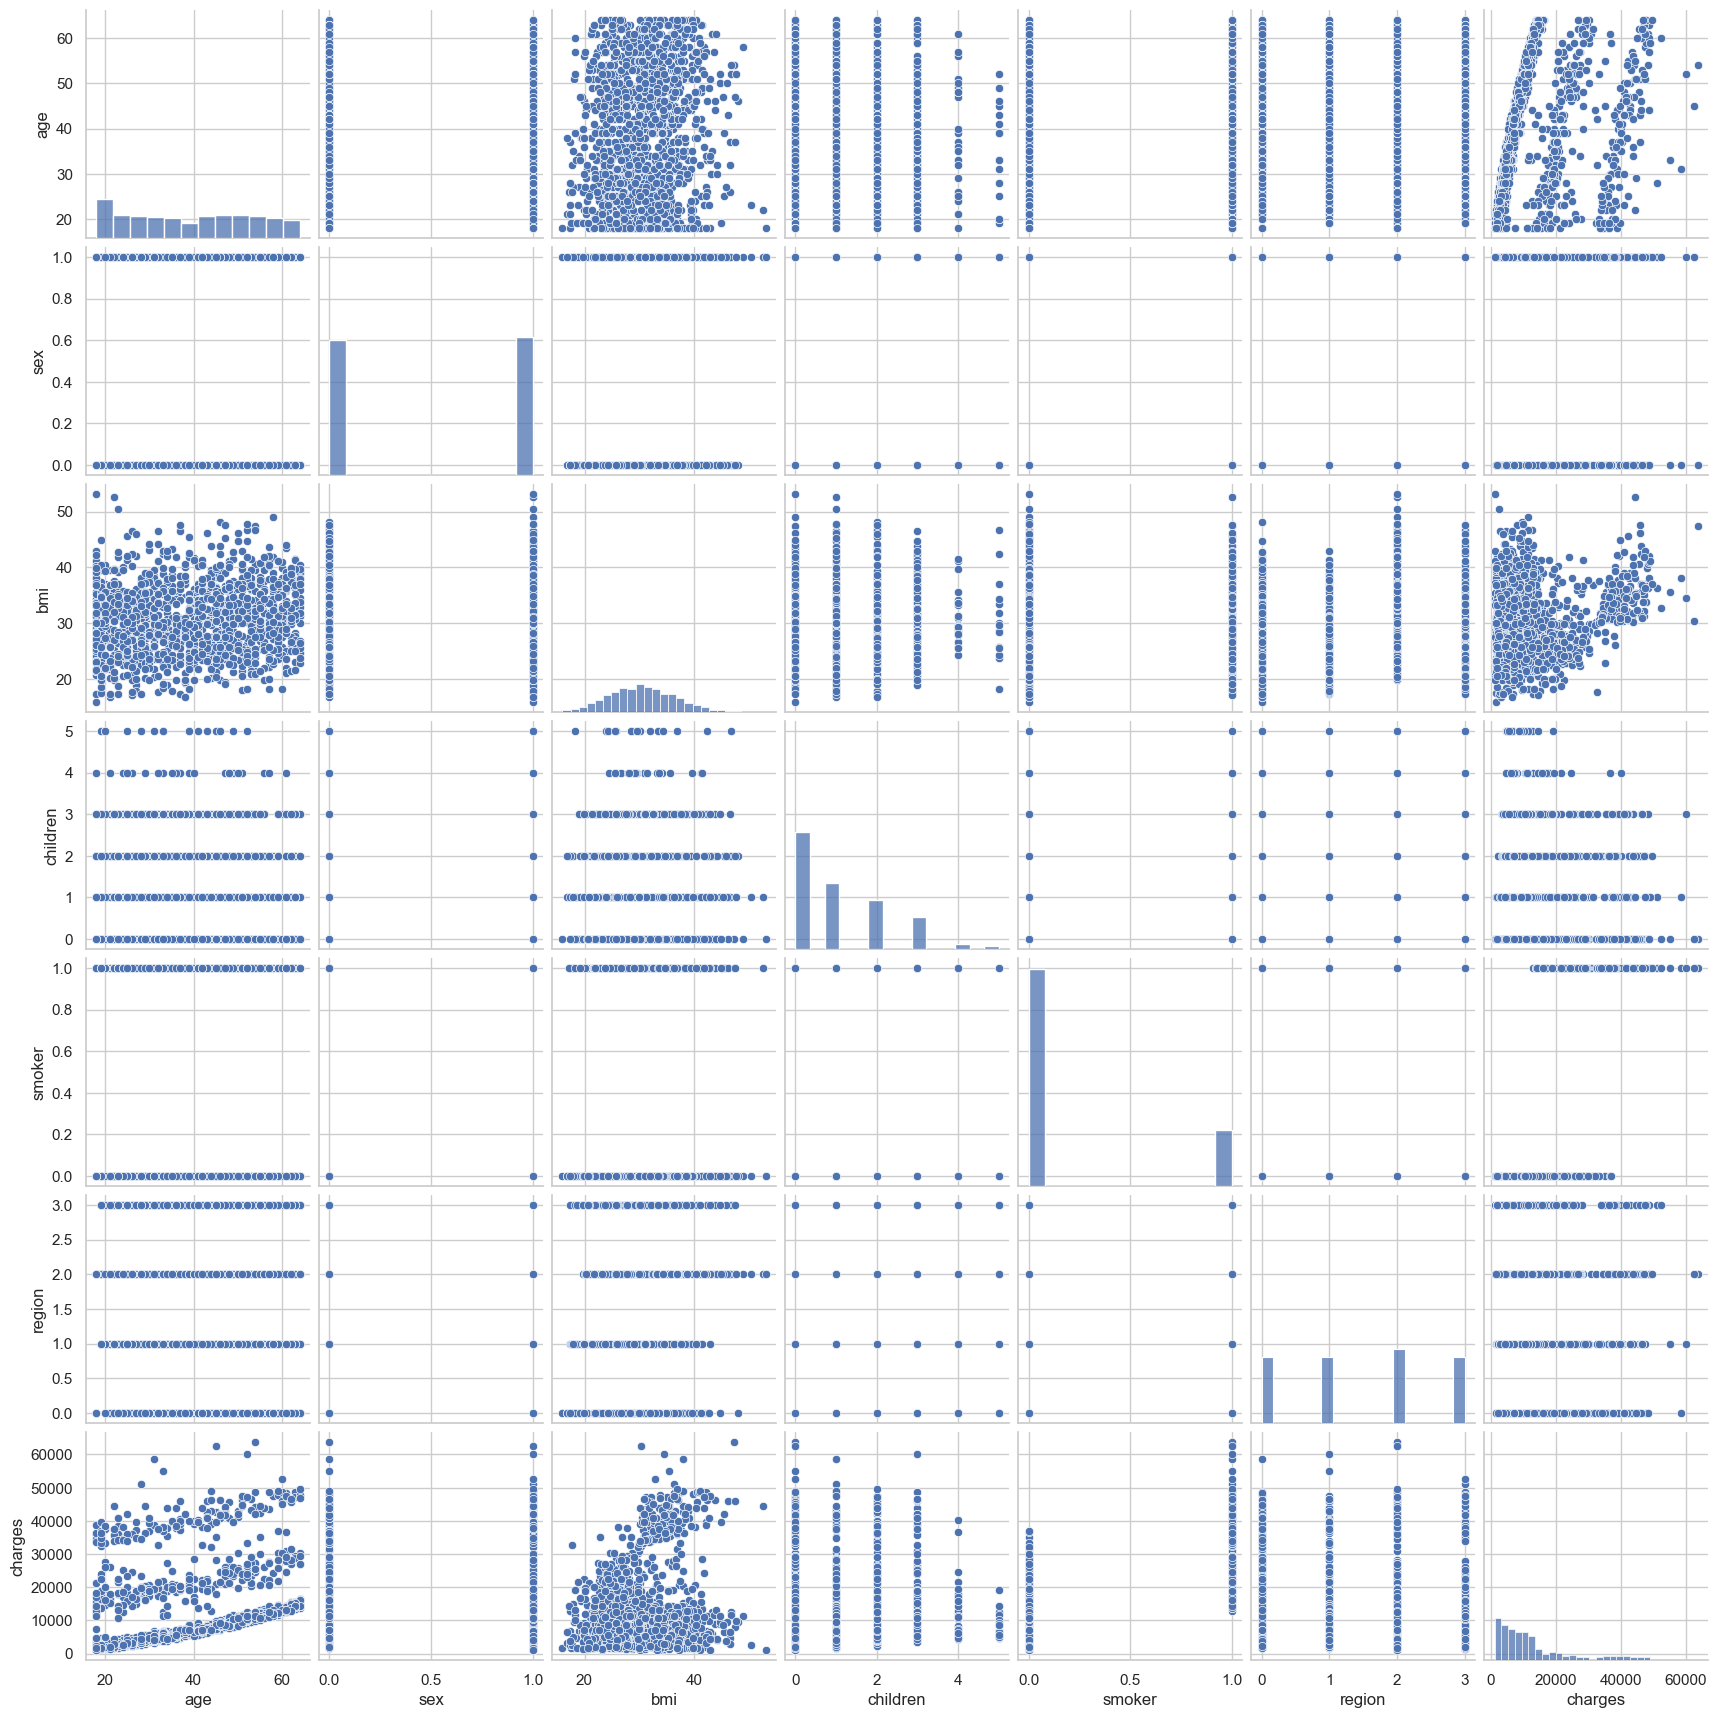

In [35]:
sns.pairplot(df)

# Compare Between Models

In [36]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

    


Training Model LR 
-----------------------------------------------
Score is 0.7833463107364538
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364538
Mean Squared Error: 33635210.43117841
Mean Absolute Error: 4186.5088983664355
Training Model RF 
-----------------------------------------------
Score is 0.8695234231142301
Training R-squared: 0.9266619169466594
Testing R-squared: 0.8695234231142301
Mean Squared Error: 20256323.05090463
Mean Absolute Error: 2517.7751040134444
Training Model DT 
-----------------------------------------------
Score is 0.7027286253134327
Training R-squared: 0.9983078124756305
Testing R-squared: 0.7027286253134327
Mean Squared Error: 46151003.82890528
Mean Absolute Error: 3008.1178282313435
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.843076599468018
Training R-squared: 0.9927812965590004
Testing R-squared: 0.843076599468018
Mean Squared Error: 24362158.87396569
Mean Absolute Error: 2577.13

### The best is RandomForestRegressor

# Now We Go To Choose Max Depth

In [38]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
for max_depth_val in max_depth_values:
    model = RandomForestRegressor(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred =model.predict(x_train)
    acc_train=model.score(x_test,y_test) 
    train_accuracy_values.append(acc_train)

In [39]:
train_accuracy_values

[0.6608048922770777,
 0.8417933495550463,
 0.8675746825596274,
 0.872677170478934,
 0.8753239247794342,
 0.8755309603734038,
 0.8729311378096285,
 0.8711685231482463]

In [40]:
final_model = RandomForestRegressor(max_depth=6,random_state = 0)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

# Model Evalulation

In [41]:
forest_train_pred = final_model.predict(x_train)
forest_test_pred = final_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 13740918.931, MSE test data: 19845744.977
R2 train data: 0.905, R2 test data: 0.872


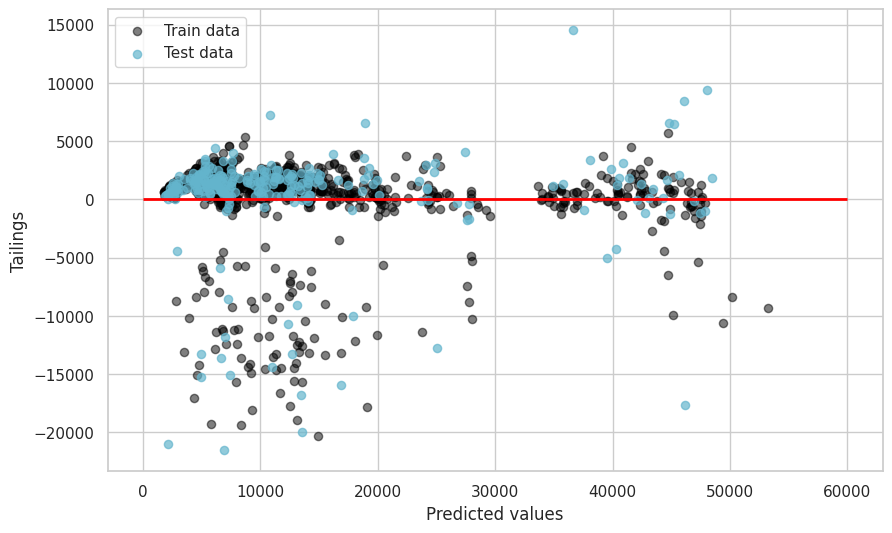

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# Try LinearRegression & PolynomialFeatures

In [42]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364538


In [43]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147239


# THANK YOU